In [1]:
import re
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from datetime import datetime as dt
import os
import sys

%matplotlib inline
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

In [2]:
rules = pd.read_csv("./data/rules-inn-as-bill.csv")
from ast import literal_eval
rules['basket'] = rules['basket'].apply(literal_eval)
rules['antecedent'] = rules['antecedent'].apply(literal_eval)
rules['consequent'] = rules['consequent'].apply(literal_eval)

In [4]:
Graphdf = pd.DataFrame(rules['basket'].tolist())

In [6]:
pdFreqSets = pd.concat([rules['lift'],
                        Graphdf],
                       axis=1)

In [8]:
# Создаем граф
G=nx.Graph()
for i in pdFreqSets.values:
    G.add_edge(i[1],
               i[2],
               weight=i[0]
              )

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_graph(graph, labels=None, graph_layout='shell',
               node_size=160, node_color='blue', node_alpha=0.3,
               node_text_size=10,
               edge_color='blue', edge_alpha=0.3, edge_tickness=1,
               edge_text_pos=0.3,
               text_font='sans-serif'):

    # these are different layouts for the network you may try
    if graph_layout == 'spring':
        graph_pos=nx.spring_layout(G)
    elif graph_layout == 'spectral':
        graph_pos=nx.spectral_layout(G)
    elif graph_layout == 'random':
        graph_pos=nx.random_layout(G)
    else:
        graph_pos=nx.shell_layout(G)
    
    custom_node_size = []
    nodes_list = np.array(list(G.nodes()))
    for node in nodes_list:
        custom_node_size.append(G.degree[node] * 100)
        
    custom_edge_size = [None]*len(G.edges())
    edge_list = np.array(list(G.edges()))
    i = 0
    for edge in edge_list:
        for index, row in rules.iterrows():
            row['basket'] = row['basket'][0:2]
            if ((edge[0] in row['basket']) & (edge[1] in row['basket'])):
                custom_edge_size[i] = row['lift']
        i = i + 1
    
    # draw graph
    nx.draw_networkx_nodes(G, graph_pos,node_size=custom_node_size, 
                           alpha=node_alpha, node_color=node_color)
    
    nx.draw_networkx_edges(G,graph_pos,width=custom_edge_size,node_size=node_size, 
                           alpha=edge_alpha, edge_color=edge_color)
    
    nx.draw_networkx_labels(G, graph_pos, font_size=node_text_size,
                            font_family=text_font)
    plt.savefig('./data/network_chart.png')

    plt.show()

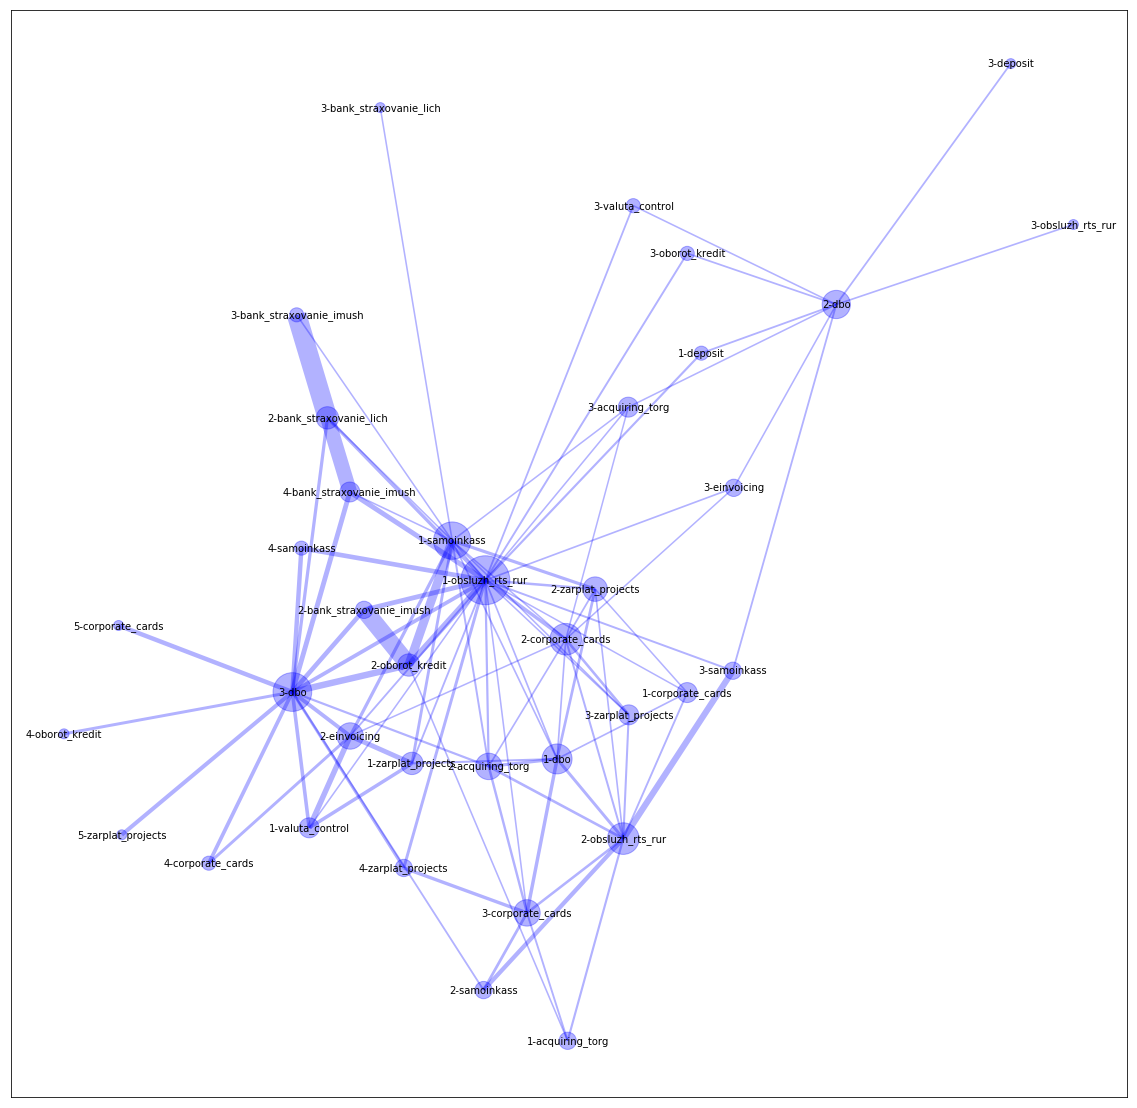

In [12]:
graph = G

plt.rcParams['figure.figsize'] = 20, 20

draw_graph(graph, graph_layout='spring')